In [1]:
#Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Fraud=pd.read_csv('/content/Fraud_check.csv')  #Read Data
print(Fraud.shape)
Fraud.head(5)

(600, 6)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
def PlotBarCharts(inpFraud, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpFraud.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [6]:
#Hist Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d1c7e0610>,
      dtype=object)

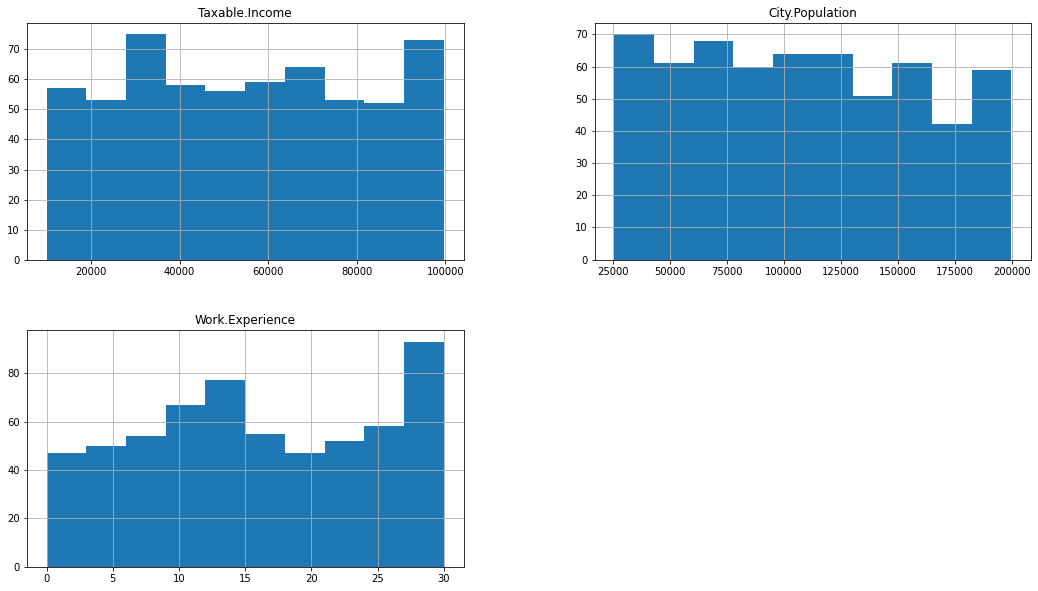

In [7]:
Fraud.hist(['Taxable.Income', 'City.Population','Work.Experience'], figsize=(18,10))

In [8]:
Fraud['Taxable.Income'].astype(float)
tax= Fraud[Fraud.loc[:,"Taxable.Income"] <= 30000]

In [9]:
Fraud['Tax'] = np.where(Fraud['Taxable.Income']<= 30000 ,'Risky', 'Good')

In [10]:
# Visual Inference using Grouped Bar charts


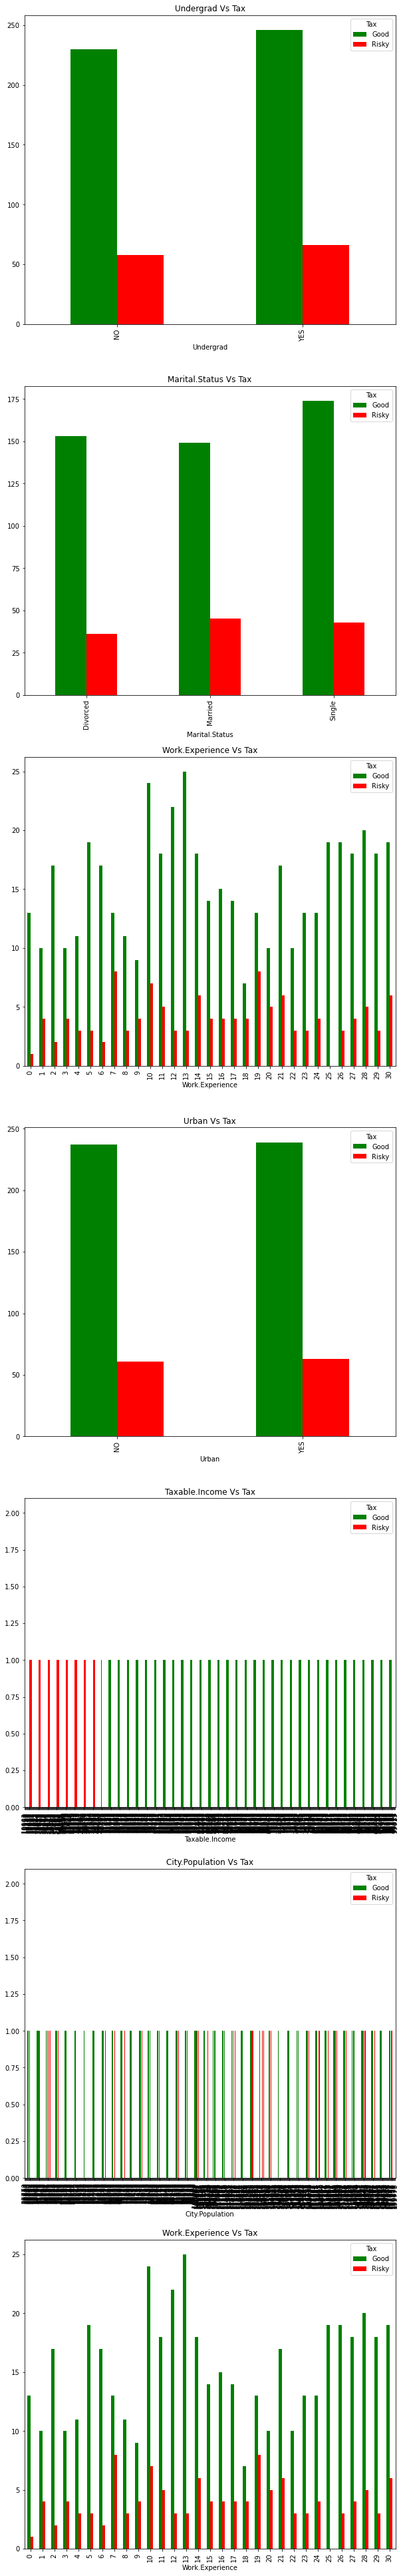

In [11]:
CategoricalColsList=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                    'Taxable.Income', 'City.Population','Work.Experience']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,70))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=Fraud[CategoricalCol], columns=Fraud['Tax'])
    CrossTabResult.plot.bar(color=['green','red'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Tax')

In [12]:
X = Fraud.drop('Tax', axis=1)
y = Fraud['Tax']

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [15]:
import category_encoders as ce

In [16]:
cat_encoder= ce.OneHotEncoder(cols=['Undergrad', 'Marital.Status','Urban'])
X_train= cat_encoder.fit_transform(X_train)
X_test= cat_encoder.fit_transform(X_test)
cat_y_encoder= ce.OneHotEncoder(cols=['Tax'])
y_train= cat_y_encoder.fit_transform(y_train)
y_test= cat_y_encoder.fit_transform(y_test)
#print(X_train.head())
#print(X_test.head())
#print(X_train.shape)
#print(X_test.shape)

In [17]:
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn import tree

In [18]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=2)
dt2.fit(X_train, y_train)
dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)
y_pred= dt2.predict(X_test)
dt2_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt2_accuracy_score)

Training score:  1.0
Testing score:  1.0
Accuracy Score:  1.0


In [19]:
dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=1)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)
y_pred= dt.predict(X_test)
dt_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt_accuracy_score)

Training score:  1.0
Testing score:  1.0
Accuracy Score:  1.0


In [20]:
dt3 = tree.DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=3)
dt3.fit(X_train, y_train)
dt3_score_train = dt3.score(X_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test, y_test)
print("Testing score: ",dt3_score_test)
y_pred= dt3.predict(X_test)
dt3_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt3_accuracy_score)

Training score:  1.0
Testing score:  1.0
Accuracy Score:  1.0


|--- feature_5 <= 30055.50
|   |--- class: 0
|--- feature_5 >  30055.50
|   |--- class: 1



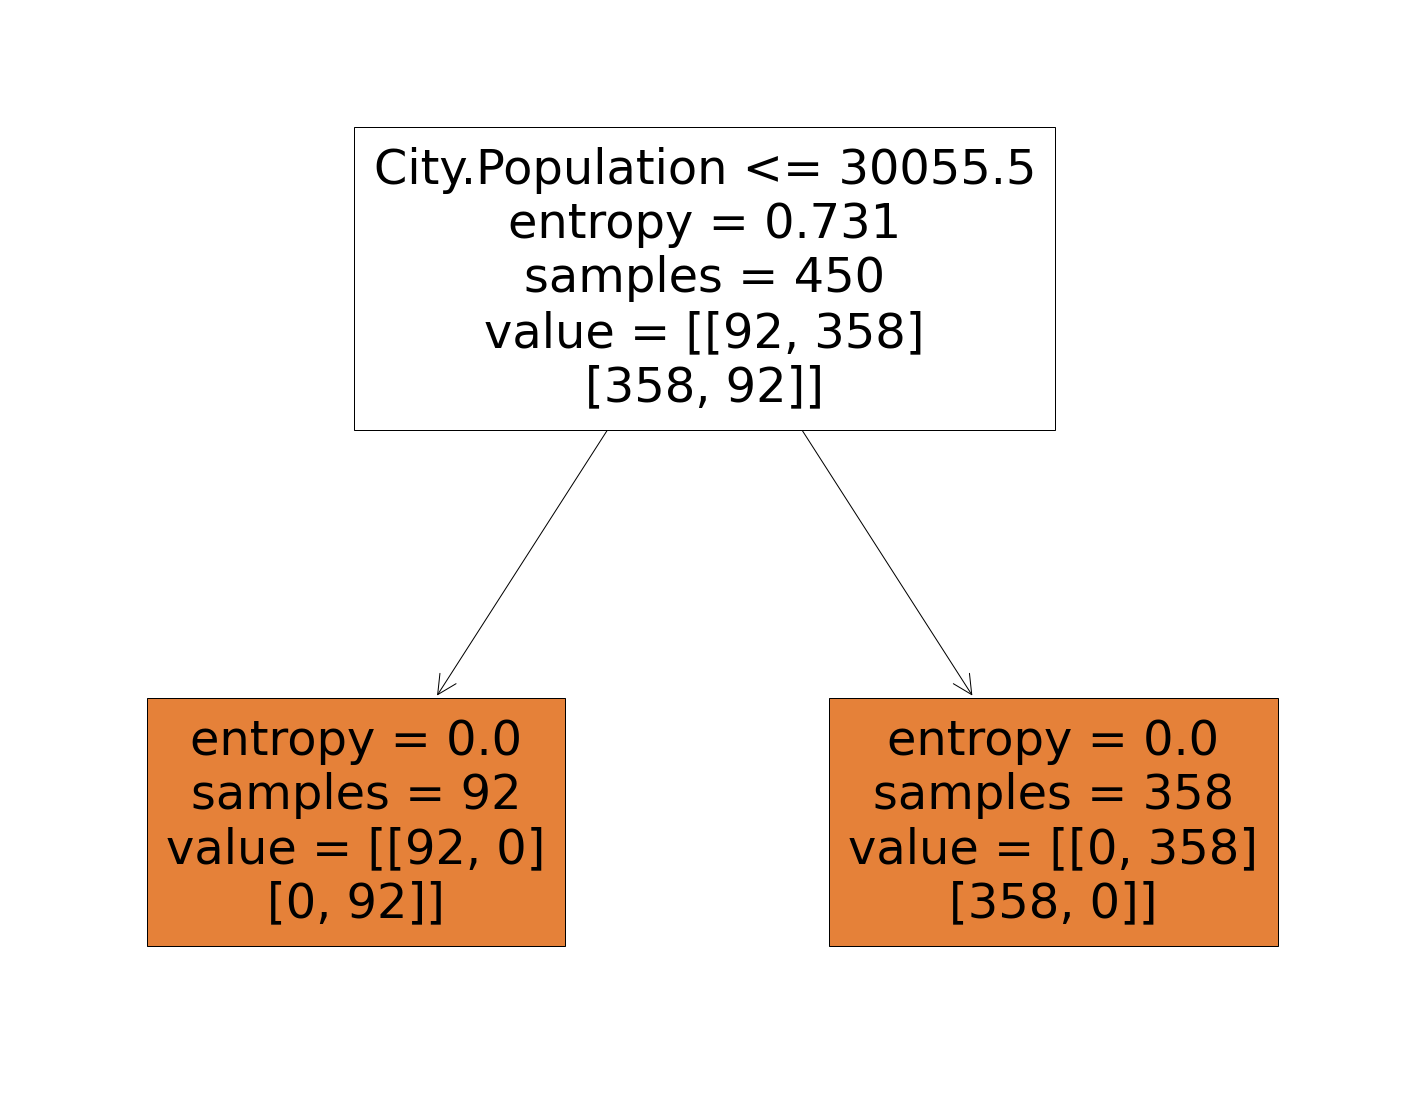

In [21]:
text_representation = tree.export_text(dt)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dt, feature_names=CategoricalColsList,filled=True)